# Detailed Explanation

### Word Embeddings 

###### Author: Saurabh Kumar


##### Agenda
- Word2Vec
- cbow
- skig-gram
- doc2vec

In [2]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models.fasttext import FastText
from smart_open import open, os
import logging
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image

from scipy import spatial
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

### Word embedding
"Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with much higher dimension.

Methods to generate this mapping include neural networks, dimensionality reduction on the word co-occurrence matrix, probabilistic models, and explicit representation in terms of the context in which words appear.

Word and phrase embeddings, when used as the underlying input representation, have been shown to boost the performance in NLP tasks such as syntactic parsing and sentiment analysis."

##### There are many techniques to create Word Embeddings. Some of the popular ones are:

- Binary Encoding
- TF Encoding
- TF-IDF Encoding
- Latent Semantic Analysis Encoding
- Topic Modeling
- Word2Vec Encoding

##### Why do we need Word Embeddings?
"Many machine learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression etc. in broad terms. And with the huge amount of data that is present in the text format, it is imperative to extract knowledge out of it and build applications."

"So a natural language modelling technique like Word Embedding is used to map words or phrases from a vocabulary to a corresponding vector of real numbers. As well as being amenable to processing by ML algorithms, this vector representation has two important and advantageous properties:

- **Dimensionality Reduction** - it is a more efficient representation
- **Contextual Similarity** - it is a more expressive representation"

### Techniques (Count versus Predictive)
Count-based methods compute the statistics of how often some word co-occurs with its neighbor words in a large text corpus, and then map these count-statistics down to a small, dense vector for each word. Predictive models directly try to predict a word from its neighbors in terms of learned small, dense embedding vectors (considered parameters of the model)."

##### Word2Vec
Word2Vec is a more recent model that embeds words in a lower-dimensional vector space using a shallow neural network. The result is a set of word-vectors where vectors close together in vector space have similar meanings based on context, and word-vectors distant to each other have differing meanings. For example, strong and powerful would be close together and strong and Paris would be relatively far. There are two versions of this model based on skip-grams (SG) and continuous-bag-of-words (CBOW), both implemented by the gensim Word2Vec class.

Word2Vec uses a trick you may have seen elsewhere in machine learning. We’re going to train a simple neural network with a single hidden layer to perform a certain task, but then we’re not actually going to use that neural network for the task we trained it on! Instead, the goal is actually just to learn the weights of the hidden layer–we’ll see that these weights are actually the “word vectors” that we’re trying to learn.

The network is going to learn the statistics from the number of times each pairing shows up. So, for example, the network is probably going to get many more training samples of (“Soviet”, “Union”) than it is of (“Soviet”, “Sasquatch”). When the training is finished, if you give it the word “Soviet” as input, then it will output a much higher probability for “Union” or “Russia” than it will for “Sasquatch”.

##### Word2Vec - Skip-gram Model
The skip-gram word2vec model, for example, takes in pairs (word1, word2) generated by moving a window across text data, and trains a 1-hidden-layer neural network based on the synthetic task of given an input word, giving us a predicted probability distribution of nearby words to the input. A virtual one-hot encoding of words goes through a 'projection layer' to the hidden layer; these projection weights are later interpreted as the word embeddings. So if the hidden layer has 300 neurons, this network will give us 300-dimensional word embeddings.

##### Word2Vec - Continuous-bag-of-words Model
Continuous-bag-of-words Word2vec is very similar to the skip-gram model. It is also a 1-hidden-layer neural network. The synthetic training task now uses the average of multiple input context words, rather than a single word as in skip-gram, to predict the center word. Again, the projection weights that turn one-hot words into averageable vectors, of the same width as the hidden layer, are interpreted as the word embeddings.

SOURCE: 
- https://en.wikipedia.org/wiki/Word_embedding
- [An Intuitive Understanding of Word Embeddings: From Count Vectors to Word2Vec](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)
- [What is word embedding in deep learning?](https://www.quora.com/What-is-word-embedding-in-deep-learning)
- [How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)
- [Advances in Pre-Training Distributed Word Representations](https://arxiv.org/pdf/1712.09405.pdf)
- [Vector Representations of Words](https://www.tensorflow.org/tutorials/word2vec)
- [Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

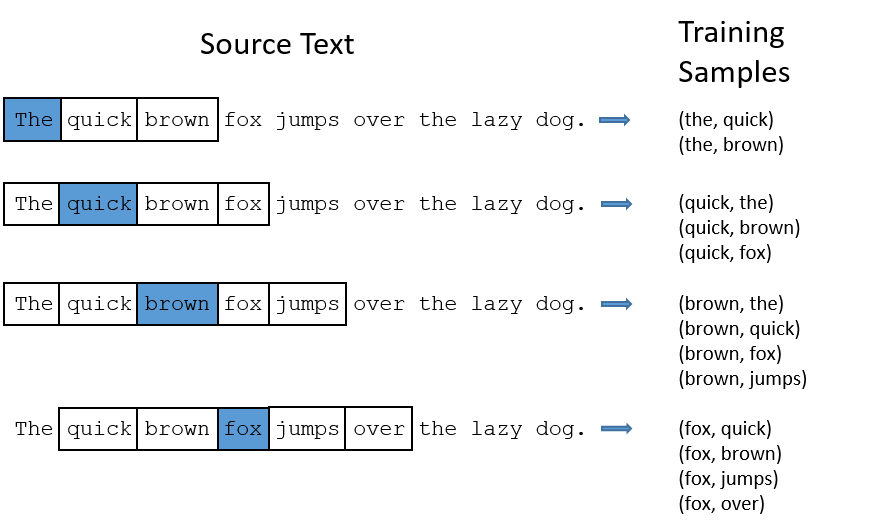

In [2]:
# Word2Vec Window
Image("https://s3.amazonaws.com/nlp.practicum/w2v_window.png", width=600)

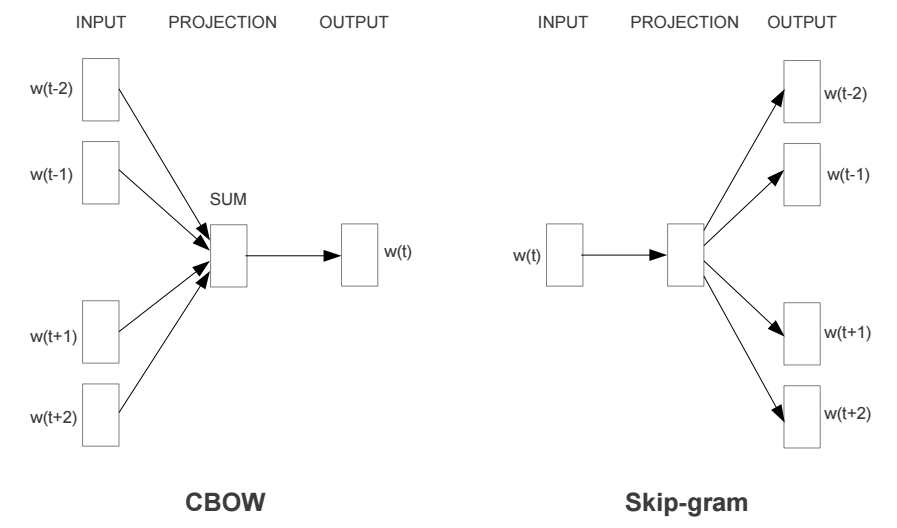

In [3]:
# Document and Word Vectors
Image("https://s3.amazonaws.com/nlp.practicum/word2vec_approaches.png", width=600)

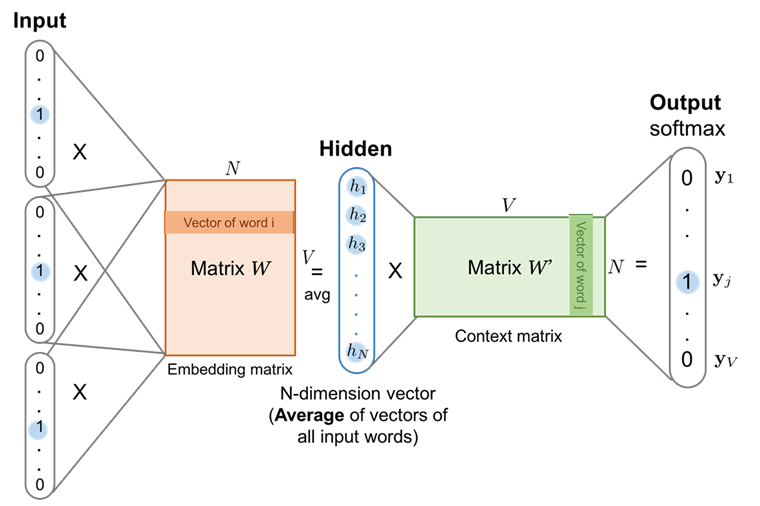

In [4]:
# CBOW Models
Image("https://s3.amazonaws.com/nlp.practicum/shallow_net.png", width=600)

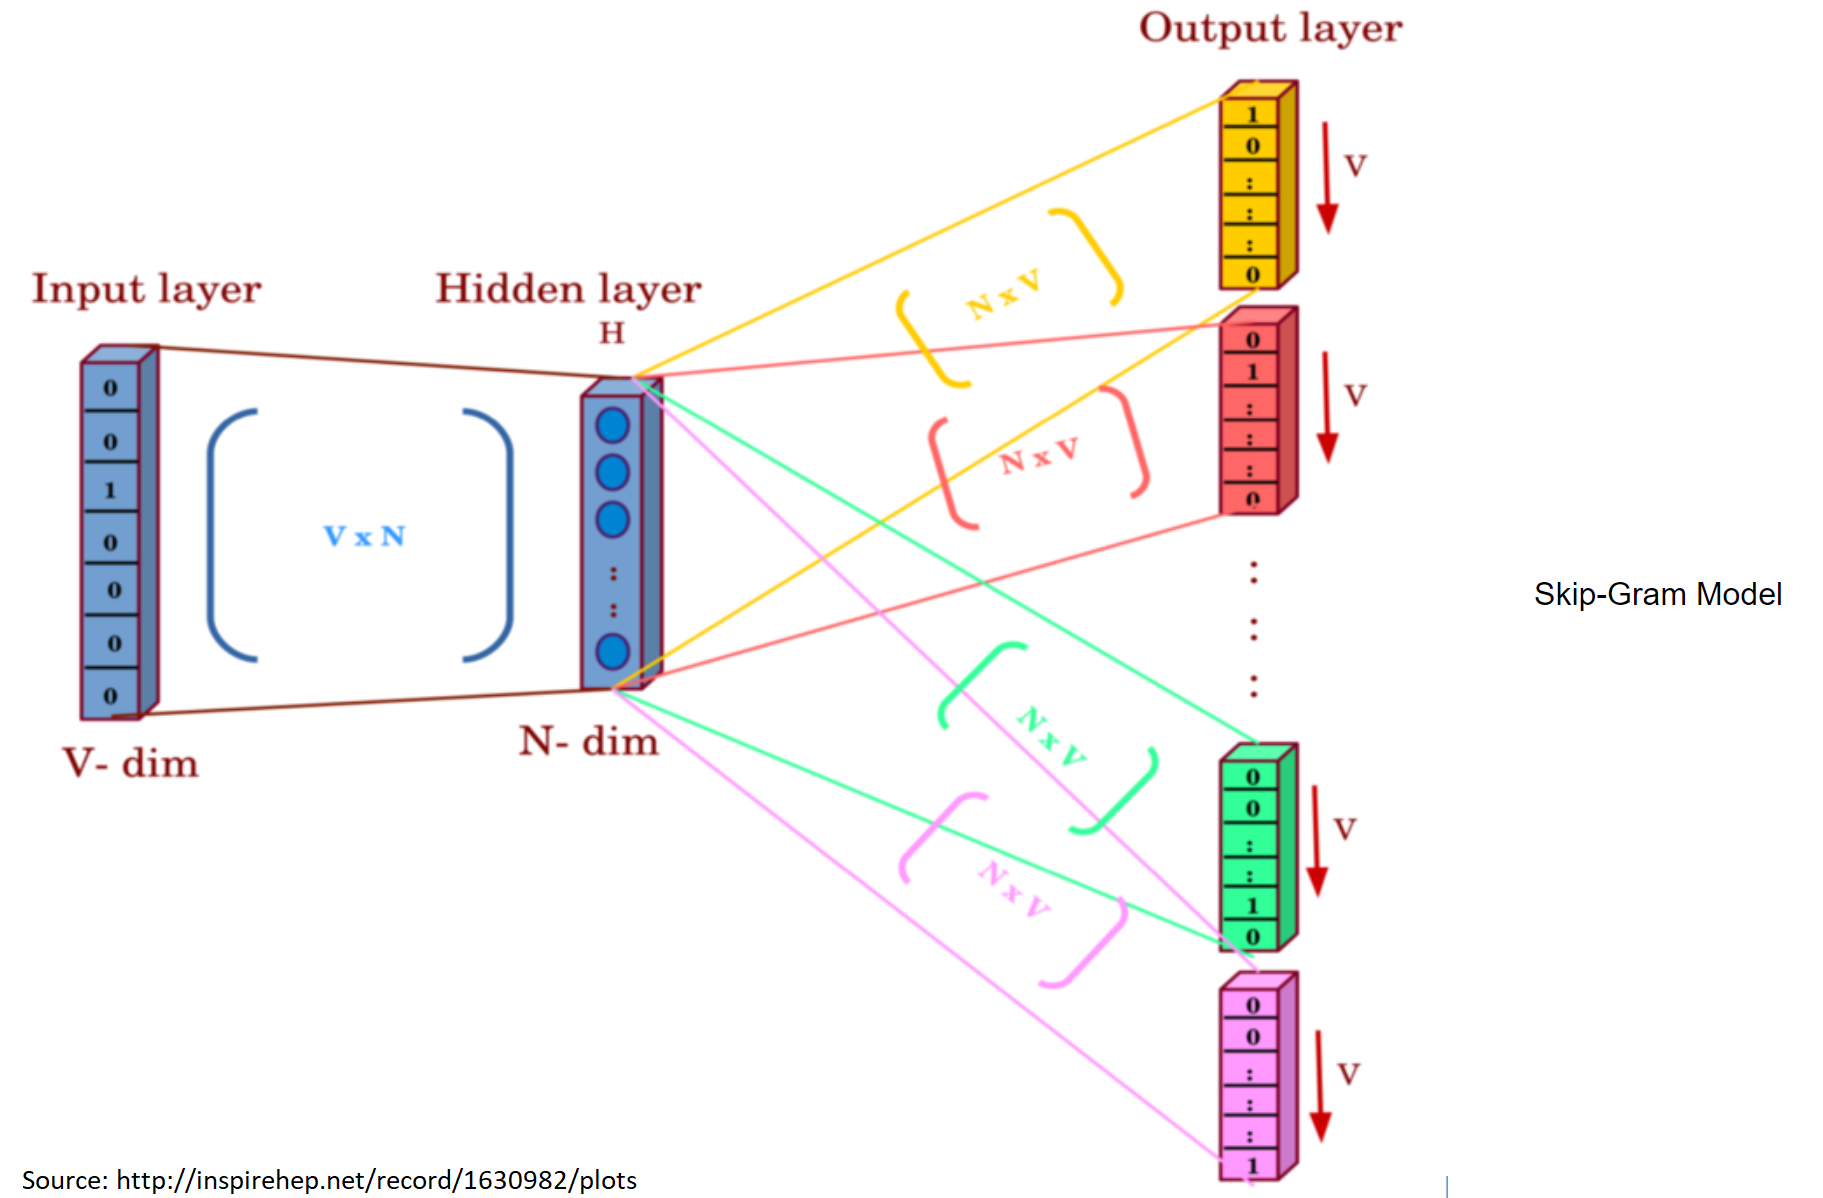

In [5]:
Image('https://towardsml.files.wordpress.com/2018/06/capture11.png')

##### Input
When training this network on word pairs, the input is a one-hot vector representing the input word and the training output is also a one-hot vector representing the output word. But when you evaluate the trained network on an input word, the output vector will actually be a probability distribution (i.e., a bunch of floating point values, not a one-hot vector).

##### The Hidden Layer
For our example, we’re going to say that we’re learning word vectors with 300 features. So the hidden layer is going to be represented by a weight matrix with 10,000 rows (one for every word in our vocabulary) and 300 columns (one for every hidden neuron).

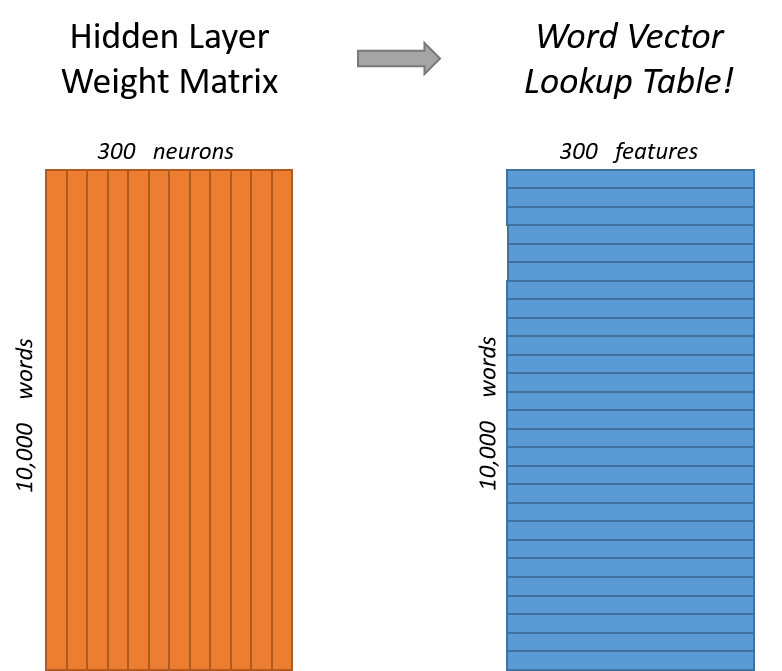

In [6]:
# Word2Vec Hidden Layer
Image("https://s3.amazonaws.com/nlp.practicum/word2vec_hidden_layer.png", width=400)

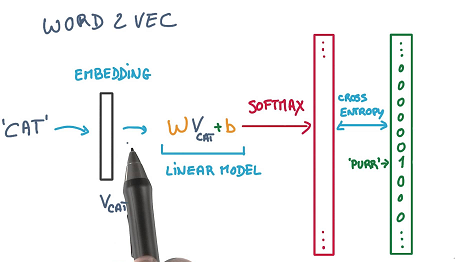

In [7]:
# Document and Word Vectors
# Image("https://s3.amazonaws.com/nlp.practicum/word_vector.png", width=400)
Image('https://i.imgur.com/R8VLFs2.png', width= 500)

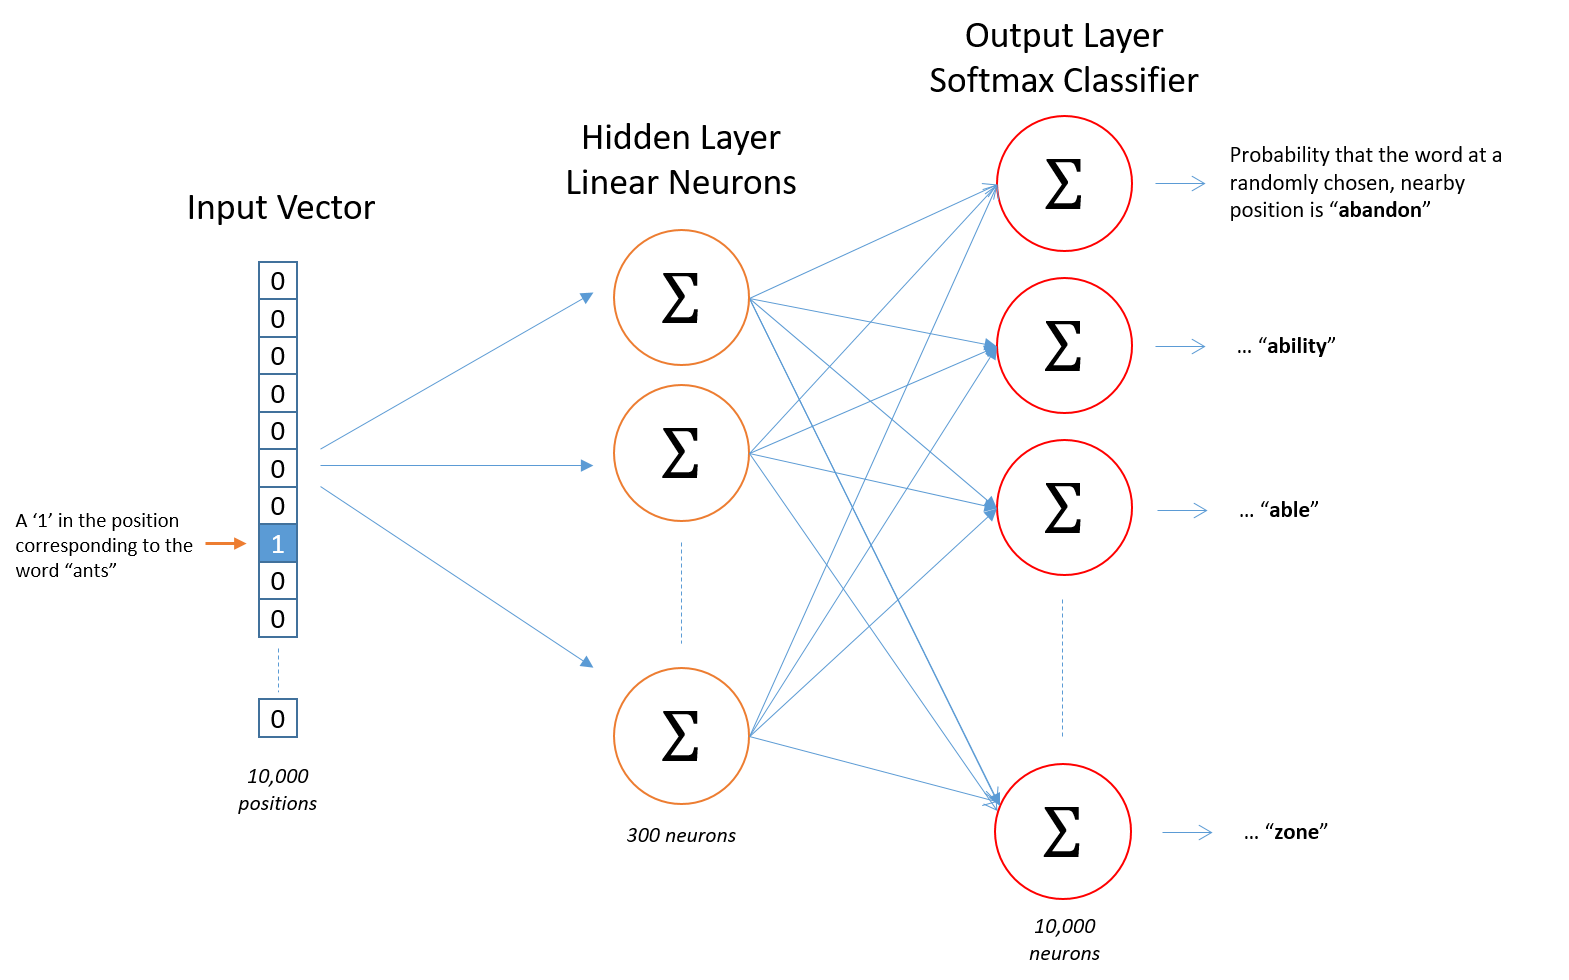

In [8]:
# Word2Vec Architecture
Image("https://s3.amazonaws.com/nlp.practicum/w2v_architecture.png", width=600)

[YouTube Video- what is a Neural Network?](https://youtu.be/aircAruvnKk?t=228)

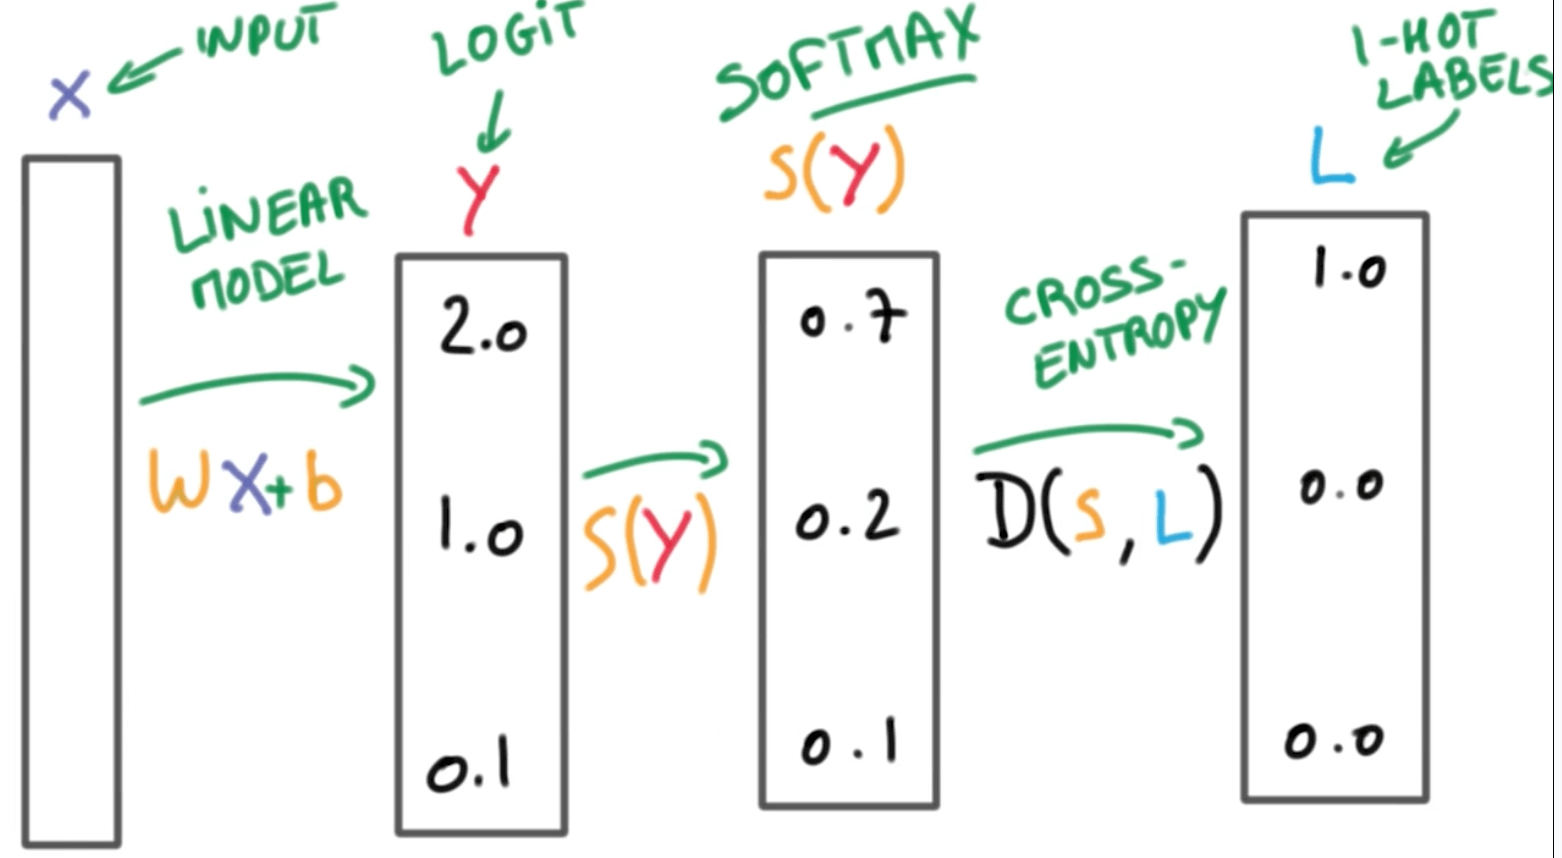

In [9]:
# Multinomial Logistic Regression
Image("https://s3.amazonaws.com/nlp.practicum/multinomial_logistic_regression.png", width=600)

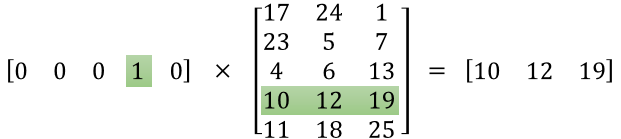

In [10]:
Image('http://mccormickml.com/assets/word2vec/matrix_mult_w_one_hot.png',width=400)

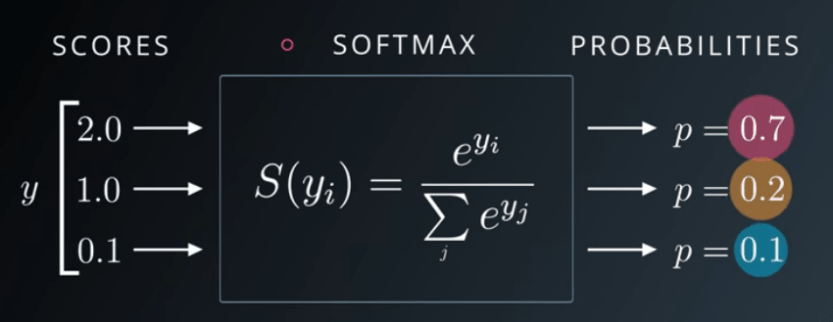

In [11]:
# Softmax
Image("https://s3.amazonaws.com/nlp.practicum/softmax.png", width=600)

In [12]:
a= np.array([2.0,1.0,0.1])
np.exp(a)

array([7.3890561 , 2.71828183, 1.10517092])

In [13]:
np.exp(a)/ sum(np.exp(a))

array([0.65900114, 0.24243297, 0.09856589])

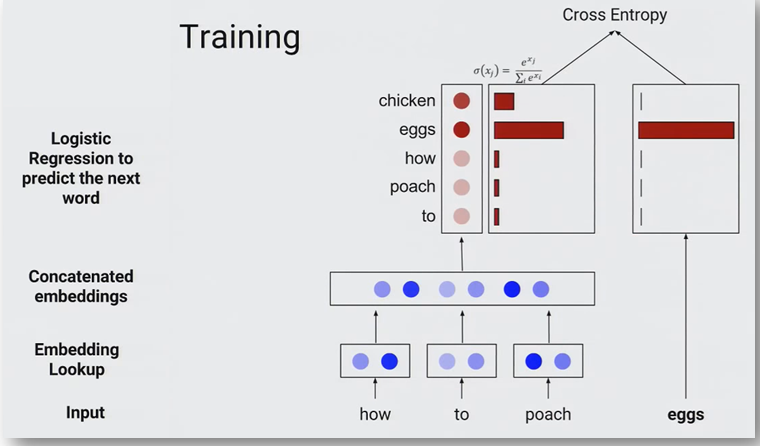

In [14]:
# Word2Vec Architecture
Image("https://s3.amazonaws.com/nlp.practicum/cross_entropy.png", width=600)

##### Cross Entropy

In a linear model, we have a scalar prediction, thus we can use an evaluation metric like MSE to evaluate the model.

When you’re using softmax, however, your output is a vector. One vector is the probability values from the output units. You can also express your data labels as a vector using what’s called one-hot encoding.

This just means that you have a vector the length of the number of classes, and the label element is marked with a 1 while the other labels are set to 0.

`y=[0,0,0,0,1,0,0,0,0,0]`

And our output prediction vector could be something like

`y=[0.047,0.048,0.061,0.07,0.330,0.062,0.001,0.213,0.013,0.150]`

We want our error to be proportional to how far apart these vectors are. To calculate this distance, we’ll use the cross entropy. Then, our goal when training the network is to make our prediction vectors as close as possible to the label vectors by minimizing the cross entropy.

SOURCE: https://towardsdatascience.com/deep-learning-concepts-part-1-ea0b14b234c8

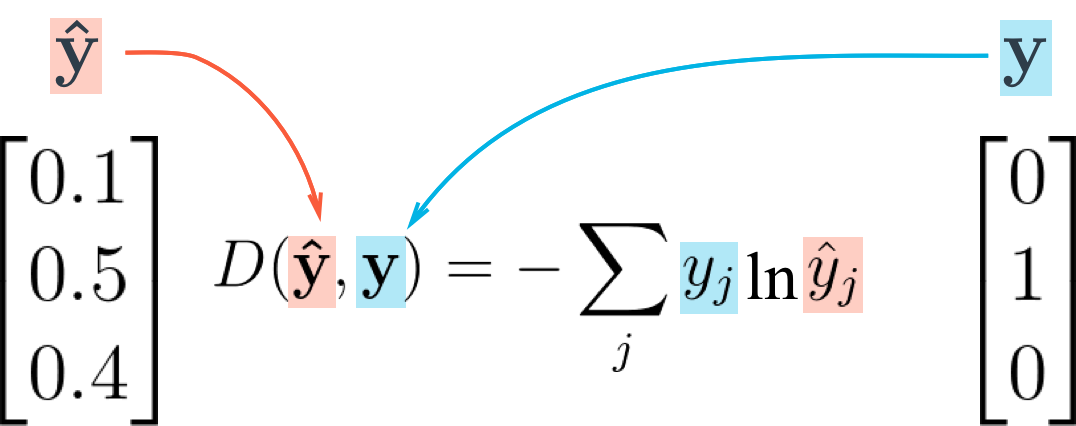

In [15]:
# Cross Entropy Example
Image("https://s3.amazonaws.com/nlp.practicum/cross_entropy_example.png", width=600)

In [2]:
0 * ln(0.1)+ 1* ln(0.5)+0*ln(0.4)

NameError: name 'ln' is not defined

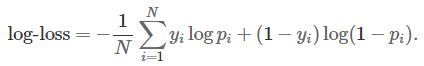

In [17]:
# Log Loss (i.e. binary cross entropy)
Image("https://s3.amazonaws.com/nlp.practicum/log_loss.png", width=600)

##### Distributed Representations of Words and Phrases and their Compositionality

There are three innovations in this second paper:

- Treating common word pairs or phrases as single “words” in their model.
- Subsampling frequent words to decrease the number of training examples.
- Modifying the optimization objective with a technique they called “Negative Sampling”, which causes each training sample to update only a small percentage of the model’s weights.

##### Phrases
Each pass only looks at combinations of 2 words, but you can run it multiple times to get longer phrases. So, the first pass will pick up the phrase “New_York”, and then running it again will pick up “New_York_City” as a combination of “New_York” and “City”.

##### Subsampling
Word2Vec implements a “subsampling” scheme to address this. For each word we encounter in our training text, there is a chance that we will effectively delete it from the text. The probability that we cut the word is related to the word’s frequency.

If we have a window size of 10, and we remove a specific instance of “the” from our text:

As we train on the remaining words, “the” will not appear in any of their context windows.
We’ll have 10 fewer training samples where “the” is the input word.

##### Negative Sampling 
Training a neural network means taking a training example and adjusting all of the neuron weights slightly so that it predicts that training sample more accurately. In other words, each training sample will tweak all of the weights in the neural network.

As we discussed above, the size of our word vocabulary means that our skip-gram neural network has a tremendous number of weights, all of which would be updated slightly by every one of our billions of training samples!

Negative sampling addresses this by having each training sample only modify a small percentage of the weights, rather than all of them. Here’s how it works.

When training the network on the word pair (“fox”, “quick”), recall that the “label” or “correct output” of the network is a one-hot vector. That is, for the output neuron corresponding to “quick” to output a 1, and for all of the other thousands of output neurons to output a 0.

With negative sampling, we are instead going to randomly select just a small number of “negative” words (let’s say 5) to update the weights for. (In this context, a “negative” word is one for which we want the network to output a 0 for). We will also still update the weights for our “positive” word (which is the word “quick” in our current example).


SOURCE:
- [Distributed Representations of Words and Phrases and their Compositionality:](https://arxiv.org/pdf/1310.4546.pdf)

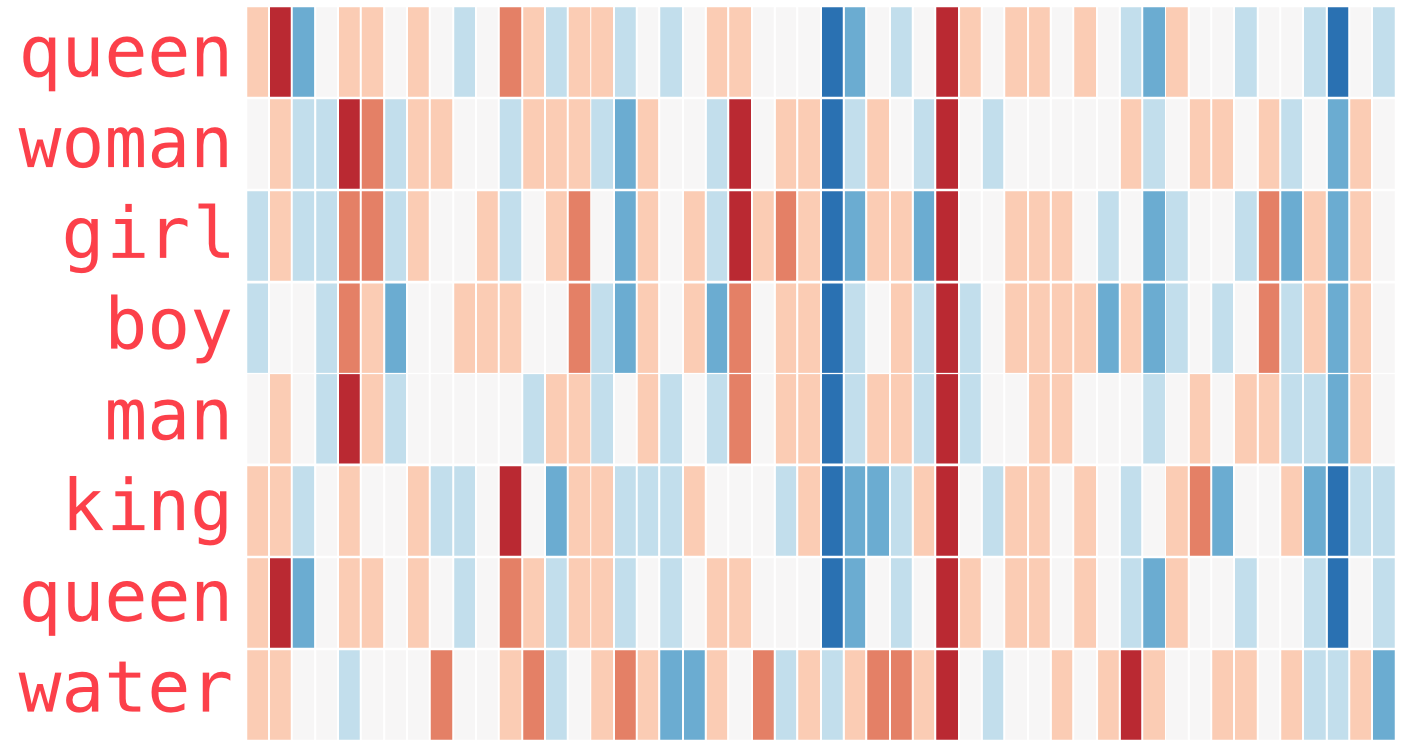

In [18]:
Image('https://jalammar.github.io/images/word2vec/queen-woman-girl-embeddings.png',width= 800)

### Train Embeddings

In [19]:
corpus = [
  'Text of the first document.',
  'Text of the second document made longer.',
  'Number three.',
  'This is number four.',
]

# we need to pass splitted sentences to the model
tokenized_sentences = [simple_preprocess(sentence) for sentence in corpus]
tokenized_sentences

[['text', 'of', 'the', 'first', 'document'],
 ['text', 'of', 'the', 'second', 'document', 'made', 'longer'],
 ['number', 'three'],
 ['this', 'is', 'number', 'four']]

In [20]:
# build a word2vec model
model = gensim.models.Word2Vec(tokenized_sentences, min_count=1)
print(model)

Word2Vec(vocab=13, size=100, alpha=0.025)


In [21]:
import logging

# add logging to view training info from gensim
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [22]:
# build a word2vec model with logging turned on
model = gensim.models.Word2Vec(tokenized_sentences, min_count=1)
print(model)

Word2Vec(vocab=13, size=100, alpha=0.025)


In [23]:
import os
os.listdir('../input/usinlppracticum')

['imdb_test.csv', 'sample_submission.csv', 'imdb_train.csv']

In [24]:
df = pd.read_csv('../input/usinlppracticum/imdb_train.csv').sample(1000).reset_index(drop=True)
df.head()

,review,sentiment
0,I just rented this movie to see Dolph Lundgren...,negative
1,Dream Quest was a surprisingly good movie. The...,positive
2,As someone who was born to a German mother and...,positive
3,I must say that during my childhood I'm quite ...,negative
4,"The setup for ""Nature of the Beast"" is ingenio...",negative


**Cleaning:**
We are lemmatizing and removing the stopwords and non-alphabetic characters for each line of dialogue.**

In [25]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed
import re
def cleaning(doc):
    doc=nlp(doc)
    txt = [token.lemma_ for token in doc if not token.is_stop]
    txt=' '.join(txt)
    txt=re.sub("[^A-Za-z']+", ' ', str(txt)).lower()
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    return txt.split()

In [26]:
from tqdm import tqdm
tqdm.pandas()

In [27]:
df['clean_review']=df['review'].progress_apply(lambda x:cleaning(x))
df['clean_review'].head()

100%|██████████| 1000/1000 [00:19<00:00, 51.80it/s]


0    [rent, movie, dolph, lundgren, see, movie, roc...
1    [dream, quest, surprisingly, good, movie, noti...
2    [bear, german, mother, english, father, spend,...
3    [childhood, proud, lot, movie, rent, exception...
4    [setup, nature, beast, ingeniously, simple, fr...
Name: clean_review, dtype: object

**Training the model**
Gensim Word2Vec Implementation:
We use Gensim implementation of word2vec: https://radimrehurek.com/gensim/models/word2vec.html

In [28]:
from gensim.models import Word2Vec

Seperate the training of the model in 3 steps:

`Word2Vec()`:

In this first step, I set up the parameters of the model one-by-one.
I do not supply the parameter sentences, and therefore leave the model uninitialized, purposefully.

`.build_vocab()`:

Here it builds the vocabulary from a sequence of sentences and thus initialized the model.
With the loggings, I can follow the progress and even more important, the effect of min_count and sample on the word corpus. I noticed that these two parameters, and in particular sample, have a great influence over the performance of a model. Displaying both allows for a more accurate and an easier management of their influence.

`.train()`:
Finally, trains the model.
The loggings here are mainly useful for monitoring, making sure that no threads are executed instantaneously.

### word2Vec Hyperparameters

- **size:** (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- **window:** (default 5) The maximum distance between a target word and words around the target word.
- **min_count:** (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- **sg:** (default 0) The training algorithm, either CBOW (0) or skip gram (1).

In [29]:
# build the same model, making the 2 steps explicit
# start with an empty model, no training occurs yet

new_model = Word2Vec(
      size=300
    , window=5
    , min_count=5
    , sg=1
)

**The parameters:**
* `min_count` = int - Ignores all words with total absolute frequency lower than this - (2, 100)
* `window` = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)
* `size` = int - Dimensionality of the feature vectors. - (50, 300)
* `sample` = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)
* `alpha` = float - The initial learning rate - (0.01, 0.05)
* `min_alpha` = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
* `negative` = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)
* `workers` = int - Use these many worker threads to train the model (=faster training with multicore machines)

In [30]:
%%time

# learn the vocabulary
new_model.build_vocab(df['clean_review'])

CPU times: user 136 ms, sys: 12 ms, total: 148 ms
Wall time: 148 ms


In [31]:
print('epochs: {}'.format(new_model.epochs))
print('corpus count: {}'.format(new_model.corpus_count))

epochs: 5
corpus count: 1000


In [32]:
%%time

# train the model
new_model.train(
      df['clean_review']
    , total_examples=new_model.corpus_count
    , epochs=5 #new_model.epochs
)

CPU times: user 6.3 s, sys: 8 ms, total: 6.3 s
Wall time: 2.25 s


(404867, 551135)

### Save Embeddings

In [33]:
# save the model
SAVED_EMBEDDINGS_PATH="w2v.model"
new_model.save(SAVED_EMBEDDINGS_PATH)
# open the model
new_model = gensim.models.Word2Vec.load(SAVED_EMBEDDINGS_PATH)

### Explore Embeddings

In [34]:
print(list(new_model.wv.vocab)[0:100])

['rent', 'movie', 'see', 'iv', 'unfortunately', 'big', 'disappointment', 'acting', 'party', 'bad', 'mr', 'okay', 'nice', 'look', 'despite', 'ridiculous', 'outfit', 'up', 'br', 'the', 'plot', 'clever', 'repeat', 'million', 'time', 'different', 'utterly', 'stereotypical', 'character', 'depth', 'expect', 'masterpiece', 'decent', 'action', 'turn', 'extremely', 'predictable', 'unbelievable', 'comic', 'book', 'like', 'start', 'annoy', 'strongly', 'pretty', 'soon', 'i', 'recommend', 'young', 'kid', 'want', 'available', 'guess', 'current', 'average', 'vote', 'influence', 'somebody', 'involve', 'make', 'dream', 'quest', 'surprisingly', 'good', 'goof', 'short', 'feel', 'urge', 'fast', 'forward', 'find', 'entertaining', 'get', 'kind', 'silly', 'overall', 'probably', 'store', 'costume', 'design', 'bear', 'german', 'mother', 'english', 'father', 'spend', 'year', 'prisoner', 'war', 'camp', 'come', 'unique', 'position', 'have', 'deal', 'nazis', 'family', 'victor', 'ww', 'miniserie']


In [35]:
# create a word vector from a trained work
print(new_model.wv['comedy'])

[ 0.00842885 -0.06016459  0.15472075 -0.09085248 -0.01386204 -0.04675978
 -0.08378506 -0.04087804 -0.05080748  0.07663753  0.03216738  0.03699785
 -0.08777783 -0.06036271 -0.1236791  -0.13222714 -0.05611532  0.14924638
 -0.02795775 -0.13411286  0.08937509  0.04284034 -0.03572359  0.02522621
 -0.08307078  0.00091713 -0.04856441  0.00117429  0.02212091 -0.00512167
 -0.04338694  0.13302304 -0.04798215 -0.00645584  0.03538532 -0.05325401
 -0.07282475 -0.03029135  0.08054644 -0.05622154 -0.0489171   0.11941147
  0.06410985 -0.08237073 -0.02436884 -0.09840196 -0.11504198  0.11614586
  0.12257412  0.04365861  0.00111821  0.06054498 -0.0115034   0.01146372
  0.13134748  0.05428608 -0.03176282 -0.07502951  0.04727972 -0.1188794
  0.00635942 -0.01014714 -0.05462405  0.19694494  0.00908131 -0.09649489
  0.08070195 -0.03013229  0.10271637  0.02802389 -0.08039168  0.0633267
 -0.07435051  0.0513442  -0.00083641 -0.0129784  -0.04065691  0.10815288
  0.15191409  0.0016686   0.01054344  0.12449419  0.0

In [36]:
new_model.most_similar(positive=['movie'], topn=10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('think', 0.9910651445388794),
 ('see', 0.990491509437561),
 ('bad', 0.9894946217536926),
 ('watch', 0.9877671599388123),
 ('recommend', 0.9825623035430908),
 ('actually', 0.9803689122200012),
 ('horror', 0.9789007902145386),
 ('laugh', 0.9765126705169678),
 ('well', 0.9743719696998596),
 ('waste', 0.9741686582565308)]

In [37]:
from itertools import combinations
compare_words = ['movie', 'film', 'good', 'awesome']

for t1, t2 in combinations(compare_words, 2):
    print('t1: {} | t2: {} | simiarity_score: {}'.format(t1, t2, new_model.wv.similarity(t1,t2)))

t1: movie | t2: film | simiarity_score: 0.9445221424102783
t1: movie | t2: good | simiarity_score: 0.9521306157112122
t1: movie | t2: awesome | simiarity_score: 0.8530462980270386
t1: film | t2: good | simiarity_score: 0.9809831976890564
t1: film | t2: awesome | simiarity_score: 0.9577765464782715
t1: good | t2: awesome | simiarity_score: 0.9442436695098877


##  Doc2Vec

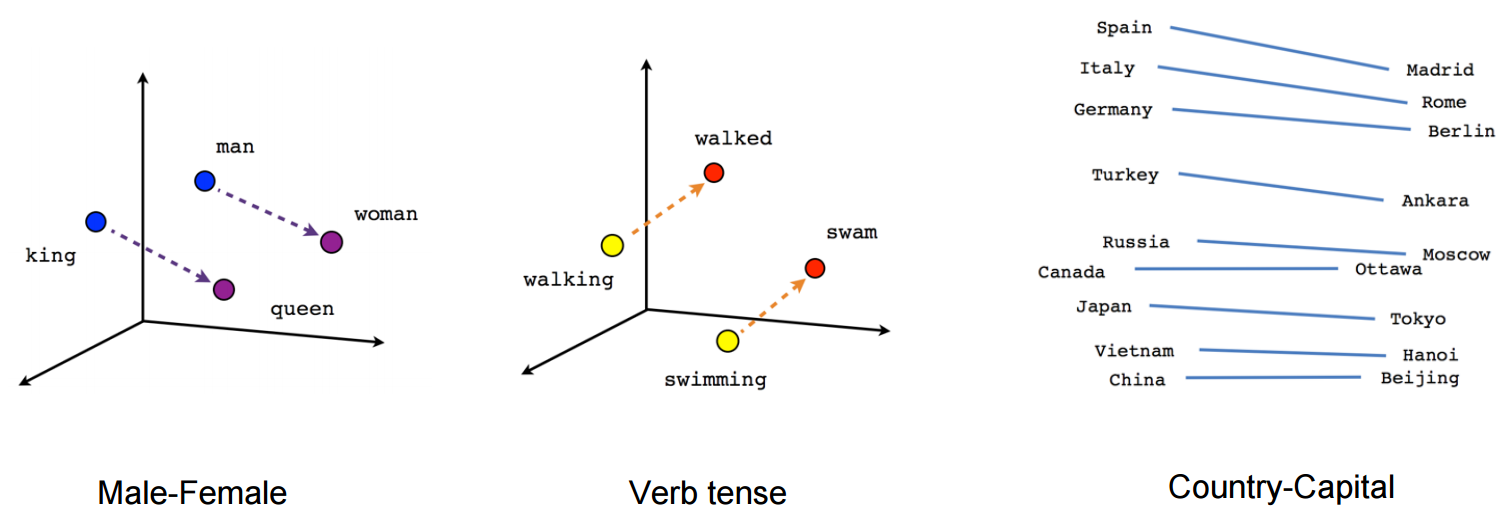

In [38]:
# Document and Word Vectors
Image("https://s3.amazonaws.com/nlp.practicum/man_to_king_w2v.png", width=800)

### `Doc2Vec`

Doc2vec (aka paragraph2vec, aka sentence embeddings) modifies the word2vec algorithm to unsupervised learning of continuous representations for larger blocks of text, such as sentences, paragraphs or entire documents.

##### `Paragraph Vector - Distributed Memory (PV-DM)`
This is the Paragraph Vector model analogous to Continuous-bag-of-words Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of inferring a center word based on context words and a context paragraph. A paragraph is a context for all words in the paragraph, and a word in a paragraph can have that paragraph as a context.

##### `Paragraph Vector - Distributed Bag of Words (PV-DBOW)`
This is the Paragraph Vector model analogous to Skip-gram Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

Paragraph Vector, aka gensim Doc2Vec
The straightforward approach of averaging each of a text's words' word-vectors creates a quick and crude document-vector that can often be useful. However, Le and Mikolov in 2014 introduced the Paragraph Vector, which usually outperforms such simple-averaging.

SOURCE: 
- [Doc2vec tutorial](https://rare-technologies.com/doc2vec-tutorial/)
- [Distributed Representations of Sentences and Documents:](https://cs.stanford.edu/~quocle/paragraph_vector.pdf)
- [Representations for Language: From Word Embeddings to Sentence Meanings
](https://nlp.stanford.edu/manning/talks/Simons-Institute-Manning-2017.pdf)
- [A gentle introduction to Doc2Vec](https://medium.com/scaleabout/a-gentle-introduction-to-doc2vec-db3e8c0cce5e)
- [Gensim Doc2vec Tutorial on the IMDB Sentiment Dataset](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-IMDB.ipynb)

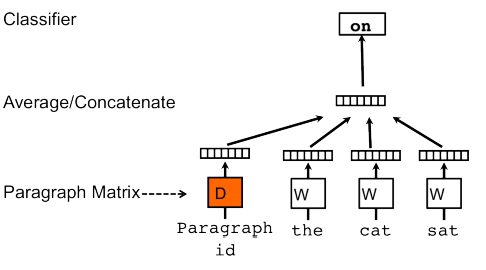

In [39]:
# Paragraph Vector - Distributed Memory (PV_DM) Model 
Image("https://s3.amazonaws.com/nlp.practicum/pv_dm.png", width=600)

In [40]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [41]:
train_corpus= [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(df['clean_review'][:1000])]

In [42]:
from gensim.models import doc2vec

d2v = doc2vec.Doc2Vec(
      vector_size=300
    , epochs=20
    , dm=0
)

print(d2v)

Doc2Vec(dbow,d300,n5,mc5,s0.001,t3)


In [43]:
d2v.build_vocab(train_corpus)

In [44]:
%%time

d2v.train(
    train_corpus,
    total_examples=d2v.corpus_count,
    epochs=d2v.epochs
)

CPU times: user 6.84 s, sys: 636 ms, total: 7.47 s
Wall time: 3.2 s


Inferring a Vector
One important thing to note is that you can now infer a vector for any piece of text without having to re-train the model by passing a list of words to the model.infer_vector function. This vector can then be compared with other vectors via cosine similarity.

In [45]:
# view a document vector
d2v.infer_vector('This was one of the most beautiful movies I have ever seen'.split()).shape

(300,)

In [46]:
similar_doc = d2v.docvecs.most_similar('2')
similar_doc

[('8', 0.9926151633262634),
 ('81', 0.992411732673645),
 ('550', 0.9895485639572144),
 ('570', 0.989090621471405),
 ('526', 0.988957405090332),
 ('255', 0.9887889623641968),
 ('374', 0.9885522127151489),
 ('684', 0.9884786009788513),
 ('832', 0.9880582094192505),
 ('974', 0.9877911806106567)]

Resources to create content:
- [Word embeddings: exploration, explanation, and exploitation (with code in Python)](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795)
- [The amazing power of word vectors](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)
- [Don’tcount,predict! Asystematiccomparisonof context-countingvs.context-predictingsemanticvectors
](http://clic.cimec.unitn.it/marco/publications/acl2014/baroni-etal-countpredict-acl2014.pdf)
- [An Intuitive Understanding of Word Embeddings: From Count Vectors to Word2Vec](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)
- [Taming Text with the SVD](ftp://ftp.sas.com/techsup/download/EMiner/TamingTextwiththeSVD.pdf)

**Pretrained Embeddings (GLove)**

In [47]:
embedding_file='../input/glove6b50dtxt/glove.6B.50d.txt'

In [48]:
embeddings_dict = {}
with open(embedding_file, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [49]:
len(embeddings_dict)

400000

In [50]:
embeddings_dict["king"].shape

(50,)

In [51]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [52]:
print(find_closest_embeddings(embeddings_dict["king"])[1:3])

['prince', 'queen']


# Word2Vec Implimentation

## Imports

In [34]:
# Importing Packages
import codecs
import os
import re
import time
import gensim
import pandas as pd
import glob
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
book_filenames = sorted(glob.glob("C:\\Users\\saurabhkumar9\\1. NLP Practicum Materials\\Data\\harrypotter\\*.txt", recursive = False))

print("Available Books: \n")
for i in book_filenames:
    print(i.split("\\")[6].split("_")[0])

Available Books: 

Book 1 - The Philosopher's Stone.txt
Book 2 - The Chamber of Secrets.txt
Book 3 - The Prisoner of Azkaban.txt
Book 4 - The Goblet of Fire.txt
Book 5 - The Order of the Phoenix.txt
Book 6 - The Half Blood Prince.txt
Book 7 - The Deathly Hallows.txt


In [55]:
chars = []
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading " + str(book_filename).split("\\")[6].split("_")[0])
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
        chars.append(len(corpus_raw))
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading Book 1 - The Philosopher's Stone.txt
Corpus is now 474429 characters long

Reading Book 2 - The Chamber of Secrets.txt
Corpus is now 1006137 characters long

Reading Book 3 - The Prisoner of Azkaban.txt
Corpus is now 1683115 characters long

Reading Book 4 - The Goblet of Fire.txt
Corpus is now 2870365 characters long

Reading Book 5 - The Order of the Phoenix.txt
Corpus is now 4479128 characters long

Reading Book 6 - The Half Blood Prince.txt
Corpus is now 5538150 characters long

Reading Book 7 - The Deathly Hallows.txt
Corpus is now 6765174 characters long



In [62]:
lens = []
lens.append(chars[0])
for i in range(1, len(chars)):
    lens.append(chars[i] - chars[i-1])
lens

[474429, 531708, 676978, 1187250, 1608763, 1059022, 1227024]

<BarContainer object of 7 artists>

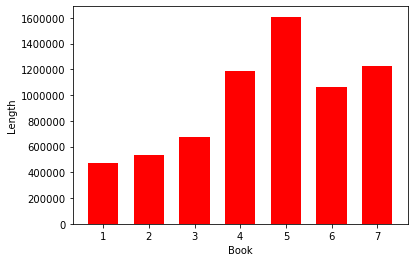

In [63]:
y = lens
N = len(y)
x = [i+1 for i in range(N)]
width = 1/1.5

pylab.xlabel("Book")
pylab.ylabel("Length")
plt.bar(x, y, width, color="red", align='center')

In [66]:
# Split into sentences
sentences = nltk.tokenize.sent_tokenize(corpus_raw)
print("Total Sentences are " + str(len(sentences)))

Total Sentences are 63914


In [67]:
# sentences to list of words
sent_words = []
total_tokens = 0
for raw_sent in sentences:
    clean = nltk.word_tokenize(re.sub("[^a-zA-Z]"," ", raw_sent.strip().lower()))
    tokens = [i for i in clean if len(i) > 1]
    total_tokens += len(tokens)
    sent_words.append(tokens)

print("Total tokens are " + str(total_tokens))

Total tokens are 1103615


In [68]:
# capture collocations
bigram = gensim.models.Phrases(sent_words)
final = []
for s in sent_words:
    processed_sent = bigram[s]
    final.append(processed_sent)

In [69]:
# Sample first two sentences
final[:2]

[['the',
  'boy',
  'who_lived',
  'mr',
  'and',
  'mrs_dursley',
  'of',
  'number_four',
  'privet_drive',
  'were',
  'proud',
  'to',
  'say',
  'that',
  'they',
  'were',
  'perfectly',
  'normal',
  'thank_you',
  'very_much'],
 ['they',
  'were',
  'the',
  'last',
  'people',
  'you',
  'expect',
  'to',
  'be',
  'involved',
  'in',
  'anything',
  'strange',
  'or',
  'mysterious',
  'because',
  'they',
  'just',
  'didn',
  'hold',
  'with',
  'such',
  'nonsense']]

## Model Parameters

We are now ready to train our word embeddings over all Harry Potter books. One thing that we need to decide upon is the model parameters. We will be using gensim's word2vec model implementation for training our model.

* Window Size: 7
* Min Count: 2
* Dimension: 200
* Workers: 3

In [70]:
num_features = 300
min_word_count = 3
num_workers = 3
context_size = 7
seed = 1

model = gensim.models.Word2Vec(sent_words, window=context_size, \
                               min_count=min_word_count, workers=num_workers, \
                               seed=seed, size=num_features
                              )

In [72]:
print('Vocabulary ' + str(len(model.wv.vocab)))

Vocabulary 11735


In [ ]:
# Save model
if not os.path.exists("model"):
    os.makedirs("model")
model.save(os.path.join("model", "harry2vec.w2v"))

In [73]:
# words 
print('Similar kind of words for AZKABAN: ')
print([i[0] for i in model.wv.most_similar('azkaban')])
print('\n')
print('Similar kind of words for SNAPE: ')
print([i[0] for i in model.wv.most_similar('snape')])

Similar kind of words for AZKABAN: 
['order', 'goblet', 'chamber', 'hallows', 'secrets', 'phoenix', 'blood', 'deathly', 'prisoner', 'fire']


Similar kind of words for SNAPE: 
['dumbledore', 'slughorn', 'moody', 'lupin', 'quirrell', 'umbridge', 'sirius', 'mcgonagall', 'riddle', 'trelawney']


In [74]:
start = time.time()
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.syn0
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)
stop = time.time() - start
print ('Time taken is ' + str(stop))

C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Time taken is 306.59584522247314


In [81]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)
points.head(20)

,word,x,y
0,the,-8.428926,-58.618954
1,boy,5.234597,-49.719177
2,who,12.367720,-55.969055
3,lived,17.734993,-58.312778
4,mr,-26.137094,-56.694862
5,and,-51.589214,-35.613922
6,mrs,-26.143578,-56.677280
7,dursley,-23.346485,-56.861229
8,of,-10.757012,-62.392181
9,number,-6.805823,-59.907803


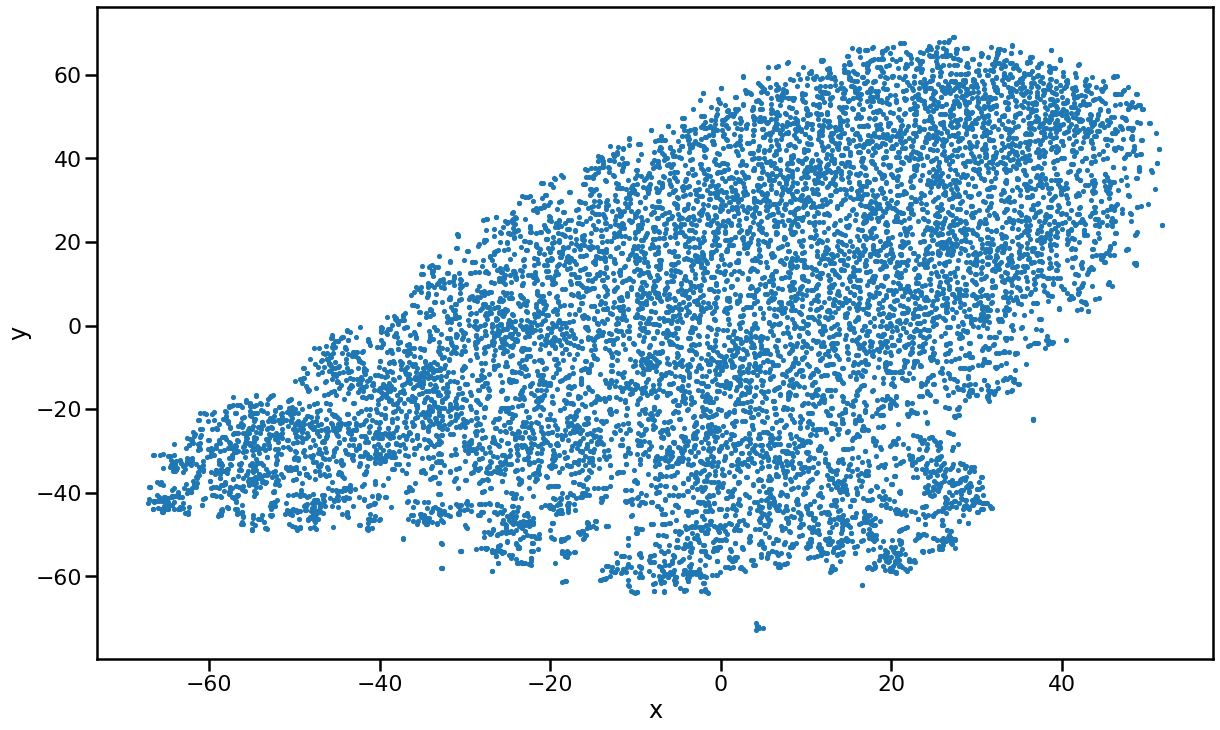

In [82]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [83]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

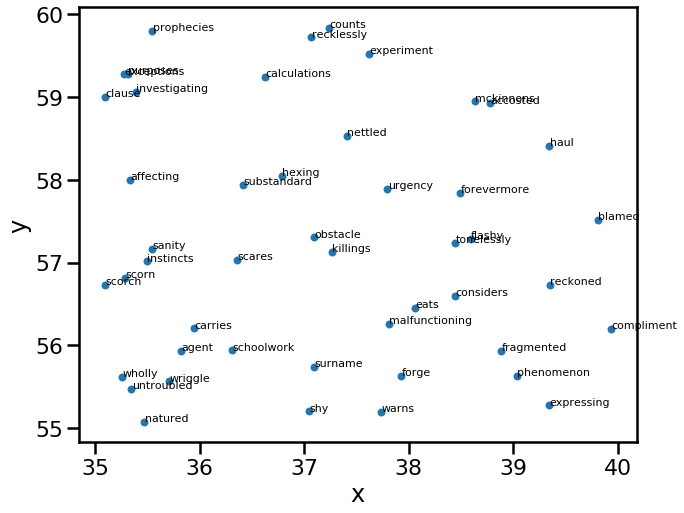

In [97]:
plot_region(x_bounds=(35, 40), y_bounds=(55, 60))

In [111]:
model.most_similar("voldemort")

C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sirius', 0.7873163223266602),
 ('dumbledore', 0.7414896488189697),
 ('somebody', 0.674490213394165),
 ('kreacher', 0.6659538745880127),
 ('he', 0.6513549089431763),
 ('regulus', 0.6511991024017334),
 ('snape', 0.6278786659240723),
 ('dark', 0.6263130903244019),
 ('curse', 0.611894428730011),
 ('riddle', 0.5953954458236694)]

# Doc2Vec

## Intro

Numeric representation of text documents is a challenging task in machine learning. Such a representation may be used for many purposes, for example: document retrieval, web search, spam filtering, topic modeling etc.

However, there are not many good techniques to do this. Many tasks use the well known but simplistic method of bag of words (BOW), but outcomes will be mostly mediocre, since BOW loses many subtleties of a possible good representation, e.g consideration of word ordering.

Latent Dirichlet Allocation (LDA) is also a common technique for topic modeling (extracting topics/keywords out of texts) but it’s very hard to tune, and results are hard to evaluate.

Doc2vec is a very nice technique. It’s easy to use, gives good results, and as you can understand from its name, heavily based on word2vec. so we’ll start with a short introduction about word2vec.

**word2vec**

word2vec is a well known concept, used to generate representation vectors out of words.

There are many good tutorials online about word2vec, but describing doc2vec without word2vec will miss the point, so I’ll be brief.

In general, when you like to build some model using words, simply labeling/one-hot encoding them is a plausible way to go. However, when using such encoding, the words lose their meaning. e.g, if we encode Paris as id_4, France as id_6 and power as id_8, France will have the same relation to power as with Paris. We would prefer a representation in which France and Paris will be closer than France and power.

**Word2vec algorithms**

word2vec representation is created using 2 algorithms: **Continuous Bag-of-Words model (CBOW) and the Skip-Gram model**

* **Continuous bag of words**

Continuous bag of words creates a sliding window around current word, to predict it from “context” — the surrounding words. Each word is represented as a feature vector. After training, these vectors become the word vectors.
<div>
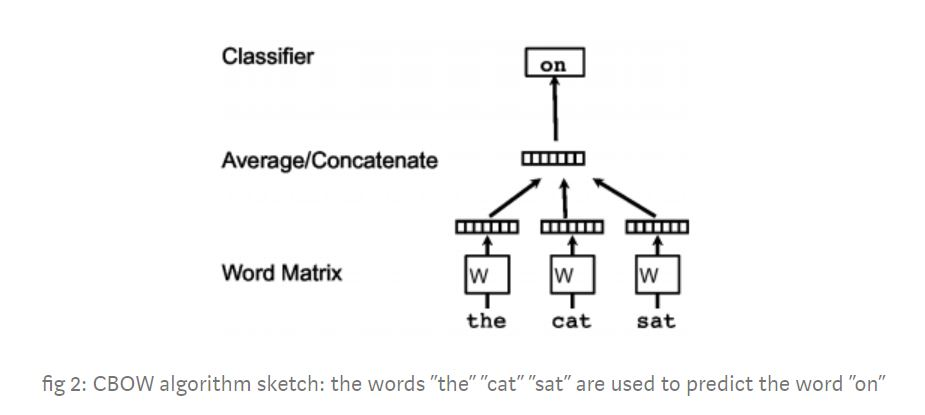
</div>
As said before, vectors which represent similar words are close by different distance metrics, and additioanly encapsualte numeric relations, such as the king-queen=man from above.

**Skip gram**

The second algorithm is actaully the opposite of CBOW: instead of prediciting one word each time, we use 1 word to predict all surrounding words (“context”). Skip gram is much slower than CBOW, but considered more accurate with infrequent words.


**Doc2vec**

As said, the goal of doc2vec is to create a numeric representation of a document, regardless of its length. But unlike words, documents do not come in logical structures such as words, so the another method has to be found.

The concept that Mikilov and Le have used was simple, yet clever: they have used the word2vec model, and added another vector (Paragraph ID below), like so:
<div>
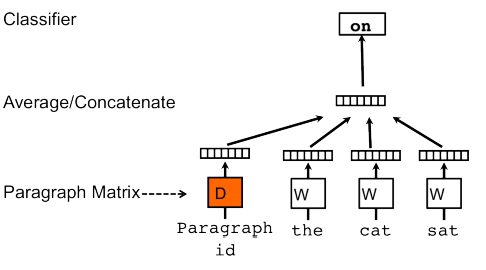
</div>
If you feel familiar with the sketch above, it’s because it is a small extension to the CBOW model. But instead of using just words to predict the next word, we also added another feature vector, which is document-unique.

So, when training the word vectors W, the document vector D is trained as well, and in the end of training, it holds a numeric representation of the document.

The model above is called Distributed Memory version of **Paragraph Vector (PV-DM)**. It acts as a memory that remembers what is missing from the current context — or as the topic of the paragraph. While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document.

As in word2vec, another algorithm, which is similar to skip-gram may be used Distributed Bag of **Words version of Paragraph Vector (PV-DBOW)**.

Here, this algorithm is actually faster (as opposed to word2vec) and consumes less memory, since there is no need to save the word vectors.

In the article, the authors state that they recommend using a combination of both algorithms, though the PV-DM model is superior and usually will achieve state of the art results by itself.

The doc2vec models may be used in the following way: for training, a set of documents is required. A word vector **W** is generated for each word, and a document vector **D** is generated for each document. The model also trains weights for a softmax hidden layer. In the inference stage, a new document may be presented, and all weights are fixed to calculate the document vector.

## Library & Data

In [112]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

Data is present at below [link](https://catalog.data.gov/dataset/consumer-complaint-database)

In [121]:
df = pd.read_csv(r"C:\Users\saurabhkumar9\1. NLP Practicum Materials\Doc2Vec data\complaints.csv")

In [ ]:
# Reading a list of documents

#now create a list that contains the name of all the text file in your data #folder
docLabels = []
docLabels = [f for f in listdir(“PATH TO YOU DOCUMENT FOLDER”) if f.endswith(‘.txt’)]

#create a list data that stores the content of all text files in order of their names in docLabels
data = []
for doc in docLabels:
    data.append(open(‘PATH TO YOU DOCUMENT FOLDER’ + doc).read())

In [122]:
df = df[['Consumer complaint narrative','Product']]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.rename(columns = {'Consumer complaint narrative':'narrative'}, inplace = True)
df.head(4)

,narrative,Product
0,transworld systems inc. \nis trying to collect...,Debt collection
2,I would like to request the suppression of the...,"Credit reporting, credit repair services, or o..."
4,"Over the past 2 weeks, I have been receiving e...",Debt collection
8,i am a victim of identity theft as previously ...,"Credit reporting, credit repair services, or o..."


In [123]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
print(df.shape)

(486861, 2)


In [124]:
# number of words
df.index = range(486861)
df['narrative'].apply(lambda x: len(x.split(' '))).sum()

99087028

## **Exploring**

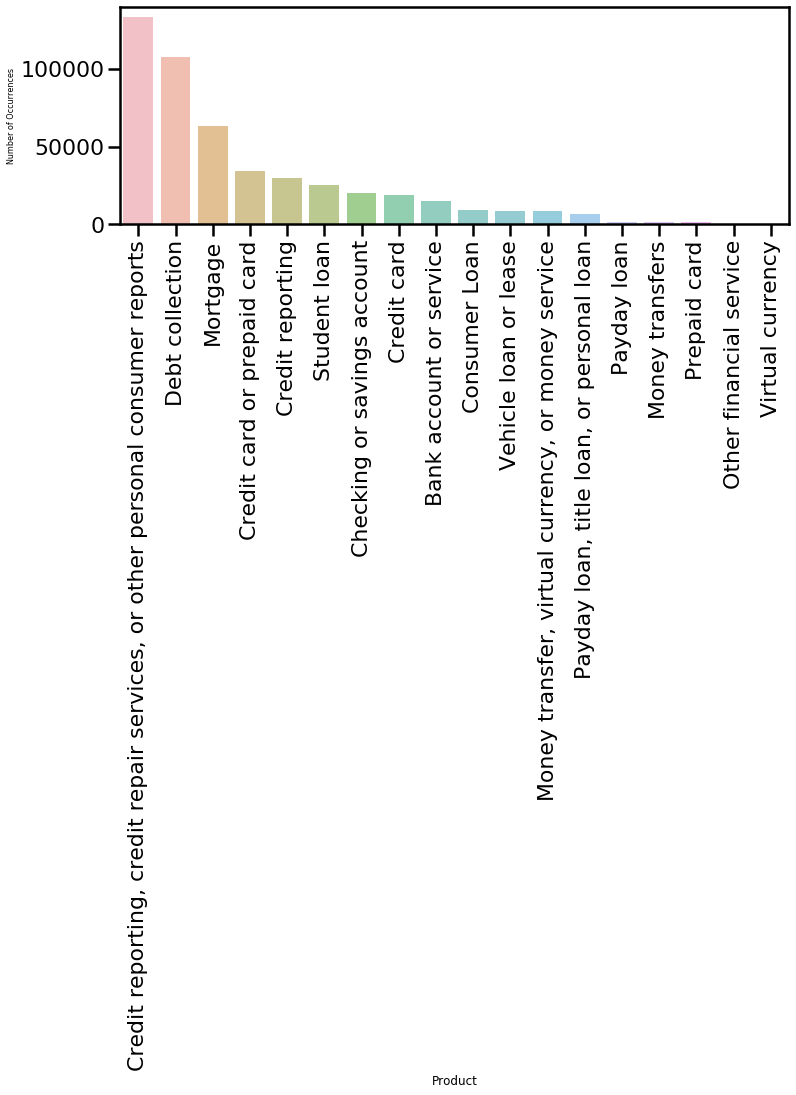

In [128]:
cnt_pro = df['Product'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.6)
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();

## How it looks

In [129]:
def print_complaint(index):
    example = df[df.index == index][['narrative', 'Product']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])
print_complaint(12)

We have already tried to contact the company with the following complaint 3 times using different avenues. In the most recent email sent, we requested that they contact us to at least acknowledge that the complaint was received. We have gotten no responses since the complaint was first filed three weeks ago. The text of the submitted complaint follows. 

To whom it may concern : We are writing to submit a formal complaint regarding the poor service that we received while working with XXXX XXXX XXXX/Closing Mark Home Loan. We are strongly considering submitting a formal complaint to the  Consumer Financial Protection Bureau and any similar state agency in Colorado and/or California, as we feel that there were instances that pushed the boundaries of acceptable and, possible, legal behavior. 
The entire loan process with this company, from start to finish, has been unprofessional at best to downright deceptive and, potentially, life-impacting. We have been forgotten, lied to, and put into

## Text Preprocessing

In [130]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

df['narrative'] = df['narrative'].apply(cleanText)

## Train Test Split & Tokenize using NLTK

Tokenizing after splitting.

In [131]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.Product]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.Product]), axis=1)

In [ ]:
train_tagged.values[30]

## Set-up Doc2Vec Training & Evaluation Models

First, we instantiate a doc2vec model — Distributed Bag of Words (DBOW). In the word2vec architecture, the two algorithm names are **continuous bag of words (CBOW)** and **skip-gram (SG)**; in the doc2vec architecture, the corresponding algorithms are **distributed memory (DM)** and **distributed bag of words (DBOW)**.

### Distributed Bag of Words (DBOW)

DBOW is the doc2vec model analogous to Skip-gram model in word2vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

We will vary the following parameters:

* If dm=0, distributed bag of words (PV-DBOW) is used; if dm=1,‘distributed memory’ (PV-DM) is used.
* 300- dimensional feature vectors.
* min_count=2, ignores all words with total frequency lower than this.
* negative=5 , specifies how many “noise words” should be drawn.
* hs=0 , and negative is non-zero, negative sampling will be used.
* sample=0 , the threshold for configuring which higher-frequency words are randomly down sampled.
* workers=cores , use these many worker threads to train the model (=faster training with multicore machines).

In [132]:
import multiprocessing
cores = multiprocessing.cpu_count()

##### Building Vocabulary

In [133]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████| 340802/340802 [00:01<00:00, 231739.20it/s]


Training a doc2vec model is rather straight-forward in Gensim, we initialize the model and train for 30 epochs.

In [134]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|█████████████████████████████████████████████████████████████████████| 340802/340802 [00:00<00:00, 1167994.89it/s]


Wall time: 42min 9s


##### Building the Final Vector Feature for the Classifier

In [139]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

##### Train the Logistic Regression Classifier

In [140]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Testing accuracy 0.2887600216350927
Testing F1 score: 0.19649276547165287


C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Distributed Memory (DM)

Distributed Memory (DM) acts as a memory that remembers what is missing from the current context — or as the topic of the paragraph. While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document. We again instantiate a Doc2Vec model with a vector size with 300 words and iterating over the training corpus 30 times.

In [141]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████| 340802/340802 [00:01<00:00, 193781.96it/s]


In [142]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|█████████████████████████████████████████████████████████████████████| 340802/340802 [00:00<00:00, 1258434.84it/s]


Wall time: 1h 9min 1s


##### Train the Logistic Regression Classifier

According to Gensim doc2vec tutorial on the [IMDB sentiment data set](https://github.com/RaRe-Technologies/gensim/blob/3c3506d51a2caf6b890de3b1b32a8b85f7566ca5/docs/notebooks/doc2vec-IMDB.ipynb), combining a paragraph vector from Distributed Bag of Words (DBOW) and Distributed Memory (DM) improves performance. We will follow, pairing the models together for evaluation.

First, we delete temporary training data to free up RAM.

In [143]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### Concatenate two models

In [145]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

### Save Model

In [ ]:
model.save('doc2vec.model')
print('model saved')

#loading the model
d2v_model = gensim.models.doc2vec.Doc2Vec.load('doc2vec.model')

### Building feature vectors

In [146]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

### Train the Logistic Regression

In [ ]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Insights

In [ ]:
#to get most similar document with similarity scores using document-index
similar_doc = d2v_model.docvecs.most_similar(14) 
print(similar_doc)

#to get most similar document with similarity scores using document- name
sims = d2v_model.docvecs.most_similar(‘1.txt’)
print(sims)

#to get vector of document that are not present in corpus 
docvec = d2v_model.docvecs.infer_vector('war.txt')
print(docvec)

# GloVe

## Introduction

GloVe stands for global vectors for word representation. It is an unsupervised learning algorithm developed by Stanford for generating word embeddings by aggregating global word-word co-occurrence matrix from a corpus. The resulting embeddings show interesting linear substructures of the word in vector space.

**Overview**

The main insight of word2vec was that we can require semantic analogies to be preserved under basic arithmetic on the word vectors, e.g. king - man + woman = queen. (Really elegant and brilliant, if you ask me.) Mikolov, et al., achieved this through continuous bag of words and/or skipgram models (word2vec comes in both flavors) that are trained to be predictive of how native speakers would intuit analogies in the real world. Under this approach, all that matters is the distance between two words, and the intrinsic statistical properties of the corpus (which were key to most earlier methods) end up getting lost.

Over at Stanford NLP, they liked the analogy preservation, but disliked losing transparency and direct consideration of the corpus’ word occurrence statistics, which they regard as fundamental to the problem. They hypothesized that by identifying a way to achieve analogy preservation under linear arithmetic that uses only these fundamental statistical properties of the corpus as inputs, they would present an improvement in both accuracy and interpretability. The GloVe paper argues that they succeeded.

**Differences b/w Word2Vec and GloVe:**

* Presence of Neural Networks: GloVe does not use neural networks while word2vec does. In GloVe, the loss function is the difference between the product of word embeddings and the log of the probability of co-occurrence. We try to reduce that and use SGD but solve it as we would solve a linear regression. While in the case of word2vec, we either train the word on its context (skip-gram) or train the context on the word (continuous bag of words) using a 1-hidden layer neural network.
* Global information: word2vec does not have any explicit global information embedded in it by default. GloVe creates a global co-occurrence matrix by estimating the probability a given word will co-occur with other words. This presence of global information makes GloVe ideally work better. Although in a practical sense, they work almost similar and people have found similar performance with both.

## Code

In [ ]:
#importing the glove library
from glove import Corpus, Glove
# creating a corpus object
corpus = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(lines, window=10)
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=5, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

Creating a glove model uses the co-occurrence matrix generated by the Corpus object to create the embeddings.

**The corpus.fit takes two arguments:**
* lines — this is the 2D array we created after the pre-processing
* window — this is the distance between two words algo should consider to find some relationship between them

**Parameters of Glove:**
* no_of_components — This is the dimension of the output vector generated by the GloVe
* learning_rate — Algo uses gradient descent so learning rate defines the rate at which the algo reaches towards the minima (lower the rate more time it takes to learn but reaches the minimum value)
* Parameters of glove.fit :
* cooccurence_matrix: the matrix of word-word co-occurrences
* epochs: this defines the number of passes algo makes through the data set
* no_of_threads: number of threads used by the algo to run

